# Part 1

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 10)

In [103]:
data = pd.read_csv('./biodeg.csv', header=None,sep = ';')
data

,0,1,2,3,4,...,37,38,39,40,41
0,3.919,2.6909,0,0,0,...,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,...,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,...,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,...,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,...,0,8.003,0,0,RB
...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,...,1,8.088,0,0,NRB
1051,5.287,3.3732,0,0,9,...,3,9.278,0,0,NRB
1052,4.869,1.7670,0,1,9,...,5,9.537,1,0,NRB
1053,5.158,1.6914,2,0,36,...,8,11.055,0,1,NRB


In [104]:
y = data.iloc[:,-1:]
X = data.iloc[:, :-1]
y = y[41]
x = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)
X

,0,1,2,3,4,...,36,37,38,39,40
0,0.426824,0.225351,0.000000,0.000000,0.00,...,0.028453,0.000,0.238782,0.00,0.000000
1,0.482651,0.156504,0.000000,0.000000,0.00,...,0.114732,0.000,0.239190,0.00,0.000000
2,0.429715,0.292264,0.000000,0.000000,0.00,...,0.217990,0.000,0.274353,0.00,0.000000
3,0.222420,0.227608,0.000000,0.000000,0.00,...,0.810693,0.000,0.181233,0.00,0.000000
4,0.497331,0.309365,0.000000,0.000000,0.00,...,0.215236,0.000,0.315445,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1050,0.763123,0.249785,0.000000,0.000000,0.00,...,0.177834,0.125,0.324134,0.00,0.000000
1051,0.731094,0.306833,0.000000,0.000000,0.25,...,0.370812,0.375,0.445773,0.00,0.000000
1052,0.638123,0.115016,0.000000,0.333333,0.25,...,0.254475,0.625,0.472248,0.25,0.000000
1053,0.702402,0.105988,0.166667,0.000000,1.00,...,0.134924,1.000,0.627415,0.00,0.037037


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)



In [106]:
C_values = [0.001,0.01,0.1,1,10,100,1000]
lin_acc = []
rbf_acc = []
poly_acc = []
train_acc = {"C_values":C_values,"Linear Kernel train":[] , "Quadratic Kernel train":[], "Rbf Kernel train":[] }
for i in C_values:
    clf = svm.SVC(kernel='linear',C=i)
    clf.fit(X_train,y_train)
    lin_acc.append(clf.score(X_test,y_test))
    train_acc["Linear Kernel train"].append(clf.score(X_train,y_train))
    
    clf = svm.SVC(kernel='rbf',C=i)
    clf.fit(X_train,y_train)
    rbf_acc.append(clf.score(X_test,y_test))
    train_acc["Rbf Kernel train"].append(clf.score(X_train,y_train))

    
    clf = svm.SVC(kernel='poly',degree = 2,C=i)
    clf.fit(X_train,y_train)
    poly_acc.append(clf.score(X_test,y_test))
    train_acc["Quadratic Kernel train" ].append(clf.score(X_train,y_train))

    

In [107]:
best_acc = max(max(lin_acc),max(rbf_acc),max(poly_acc))
best_acc

0.8815165876777251

In [108]:
print("Linear Kernel" )
print(lin_acc)
print("Rbf Kernel" )
print(rbf_acc)
print("Poly_ Kernel" )
print(poly_acc)

Linear Kernel
[0.6445497630331753, 0.6445497630331753, 0.8341232227488151, 0.8483412322274881, 0.8720379146919431, 0.8436018957345972, 0.8578199052132701]
Rbf Kernel
[0.6445497630331753, 0.6445497630331753, 0.8199052132701422, 0.8625592417061612, 0.8767772511848341, 0.8767772511848341, 0.8720379146919431]
Poly_ Kernel
[0.6445497630331753, 0.6445497630331753, 0.8388625592417062, 0.8483412322274881, 0.8436018957345972, 0.8625592417061612, 0.8815165876777251]


In [109]:
dick = {"C_values":C_values,"Linear Kernel":lin_acc , "Quadratic Kernel":poly_acc, "Rbf Kernel":rbf_acc }
pd.DataFrame.from_dict(dick)

,C_values,Linear Kernel,Quadratic Kernel,Rbf Kernel
0,0.001,0.644550,0.644550,0.644550
1,0.010,0.644550,0.644550,0.644550
2,0.100,0.834123,0.838863,0.819905
3,1.000,0.848341,0.848341,0.862559
4,10.000,0.872038,0.843602,0.876777
5,100.000,0.843602,0.862559,0.876777
6,1000.000,0.857820,0.881517,0.872038


In [111]:
pd.DataFrame.from_dict(train_acc)

,C_values,Linear Kernel train,Quadratic Kernel train,Rbf Kernel train
0,0.001,0.667062,0.667062,0.667062
1,0.010,0.667062,0.667062,0.667062
2,0.100,0.813981,0.809242,0.805687
3,1.000,0.867299,0.873223,0.868483
4,10.000,0.887441,0.901659,0.915877
5,100.000,0.899289,0.930095,0.941943
6,1000.000,0.901659,0.954976,0.977488


# Part 2

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torch import optim

In [88]:
torch.manual_seed(0)
np.random.seed(0)
data = pd.read_csv('./biodeg.csv', header=None,sep = ';')
data

,0,1,2,3,4,...,37,38,39,40,41
0,3.919,2.6909,0,0,0,...,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,...,0,7.257,0,0,RB
...,...,...,...,...,...,...,...,...,...,...,...
1053,5.158,1.6914,2,0,36,...,8,11.055,0,1,NRB
1054,5.076,2.6588,2,0,0,...,0,9.130,0,2,NRB


In [89]:
for i in range(data.shape[0]):
    if data[41][i]=='RB':
        data.at[i,41] = float(1.0)
    else:
        data.at[i,41] = float(0.0)
        
data[41] = data[41].astype(float)
x = data.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)
train_df,test_df = train_test_split(data, test_size=0.2, random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
data

,0,1,2,3,4,...,37,38,39,40,41
0,0.426824,0.225351,0.000000,0.0,0.0,...,0.0,0.238782,0.0,0.000000,1.0
1,0.482651,0.156504,0.000000,0.0,0.0,...,0.0,0.239190,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1053,0.702402,0.105988,0.166667,0.0,1.0,...,1.0,0.627415,0.0,0.037037,0.0
1054,0.684164,0.221518,0.166667,0.0,0.0,...,0.0,0.430645,0.0,0.074074,0.0


In [90]:
class MyDataset(Dataset):
    def __init__(self,df,mode = 'train'):
        self.mode = mode
        if self.mode == 'train':
            self.inp = df.iloc[:,:-1].values
            self.out = df.iloc[:,-1:].values.reshape(df.shape[0],1)
        else:
            self.inp = df.values
            
    def __len__(self):
        return len(self.inp)
    
    def __getitem__(self,idx):
        
        if self.mode == 'train':
            inpt = torch.Tensor(self.inp[idx])
            oupt = torch.Tensor(self.out[idx])
        
            return {'inp':inpt,'oup':oupt}
        
        else:
            inpt = torch.Tensor(self.inp[idx])
            return {'inp':inpt}
        

In [91]:
train_data = MyDataset(train_df)
train_dl = DataLoader(dataset = train_data , batch_size = 32 , shuffle = False)
test_data = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1:]
test_data = MyDataset(test_data,mode='test')
test_dl = DataLoader(dataset = test_data)

In [92]:
class MyModel(nn.Module):
    def __init__(self,h_sizes,out_size=1):
        super().__init__()
        
        self.hidden = nn.ModuleList()
        for k in range (len(h_sizes)-1):
            self.hidden.append(nn.Linear(h_sizes[k] , h_sizes[k+1]))
            
        self.out = nn.Linear(h_sizes[-1],out_size)
        
    def forward(self,x):
        for layer in self.hidden:
            x = F.relu(layer(x))
        output = torch.sigmoid(self.out(x))
        
        return output
    

In [93]:
def training(train_dl , hidden_layers , learning_rate):
    model = MyModel(hidden_layers)
    optimizer = optim.SGD(model.parameters(), lr = learning_rate)
    criterion=nn.BCELoss()
    epochs = 250
    model.zero_grad()
    optimizer.zero_grad()
    for epoch in range(epochs):
        epoch_loss = 0
        epoch_acc = 0
        optimizer.zero_grad()

        for bidx,batch in (enumerate(train_dl)):
            x_t,y_t = batch['inp'],batch['oup']
            x_t = x_t.view(-1,41)
            preds = model(x_t)
            loss = criterion(preds,y_t)
            epoch_loss+=loss

            acc = ((preds > 0.50000).float() == y_t).float().mean()
            epoch_acc += acc

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
    return model

def testing(model , test_dl):
    model.eval()
    y_predictions = []
    for bidx,batch in (enumerate(test_dl)):
            x_test = batch['inp']
            x_test = x_test.view(-1,41)
            preds = model(x_test)
            ans = ((preds > 0.50000).float())
            y_predictions.append(ans.detach().numpy()[0][0])
            
    return y_predictions

def get_acc(y_predictions , y_test):
    correct = 0
    y_test = y_test.to_numpy()
    for i in range(len(y_predictions)):
        if y_predictions[i] == y_test[i]:
            correct+=1
        
    return (correct/len(y_predictions))

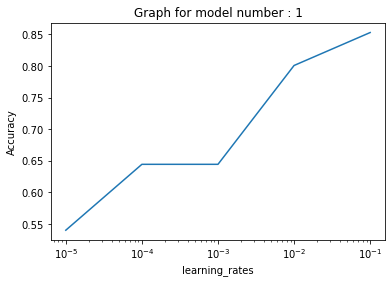

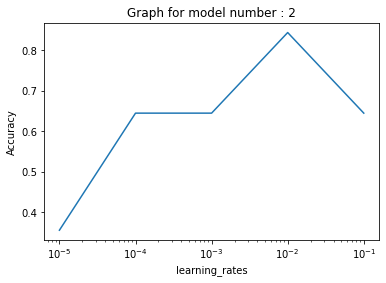

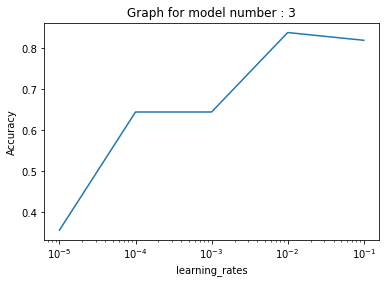

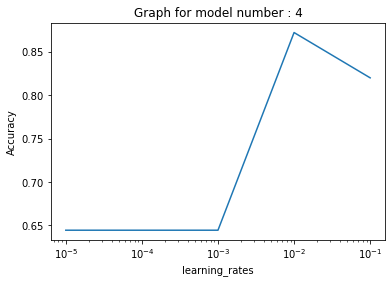

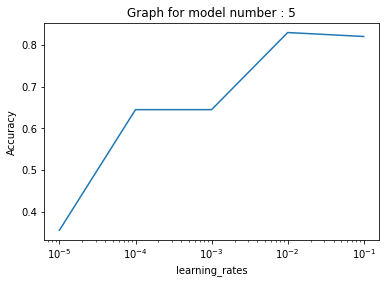

In [94]:
layer1 = [41]
layer2 = [41,2]
layer3 = [41,6]
layer4 = [41,2,3]
layer5 = [41,3,2]
layers = [layer1,layer2,layer3,layer4,layer5]
learning_rates = [0.1,0.01,0.001,0.0001,0.00001]


model_vs_acc = {0.1:[],0.01:[],0.001:[],0.0001:[],0.00001:[]}
acc_vs_lr = []
for i,hidden_layer in enumerate(layers):
    x_axis = []
    y_axis = []
    for learning_rate in learning_rates:
        model = training(train_dl,hidden_layer,learning_rate)
        y_predictions = testing(model,test_dl)
        acc = get_acc(y_predictions,y_test)
        model_vs_acc[learning_rate].append(acc)
        y_axis.append(acc)
        x_axis.append(learning_rate)
        
    plt.plot(x_axis,y_axis)
    plt.ylabel('Accuracy')
    plt.xlabel('learning_rates')
    plt.xscale('log')
    plt.title("Graph for model number : " + str(i+1))
    grp = plt.show()

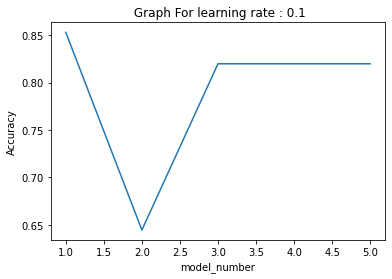

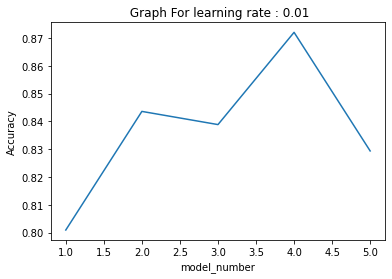

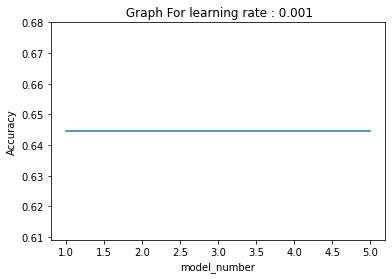

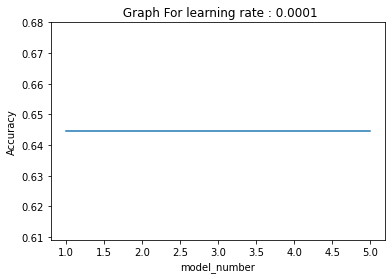

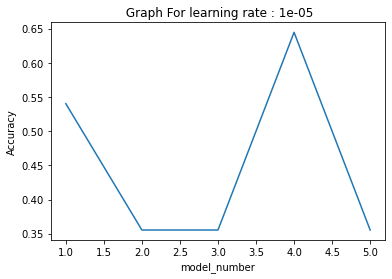

In [95]:
x_axis = [1,2,3,4,5]
for key in model_vs_acc.keys():
    plt.plot(x_axis,model_vs_acc[key])
    plt.xlabel('model_number')
    plt.ylabel('Accuracy')
    plt.title(" Graph For learning rate : " + str(key))
    plt.show()

In [99]:

pd.DataFrame.from_dict(model_vs_acc,orient='index',columns=['model 1', 'model 2', 'model 3', 'model 4', 'model 5'])

,model 1,model 2,model 3,model 4,model 5
0.10000,0.853081,0.644550,0.819905,0.819905,0.819905
0.01000,0.800948,0.843602,0.838863,0.872038,0.829384
0.00100,0.644550,0.644550,0.644550,0.644550,0.644550
0.00010,0.644550,0.644550,0.644550,0.644550,0.644550
0.00001,0.540284,0.355450,0.355450,0.644550,0.355450
